# CS210 PROJECT

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reading Excel File and Data Processing

In [7]:
df = pd.read_excel("boulder_data.xlsx")
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month  

In [8]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Progression of Monthly Average Grades

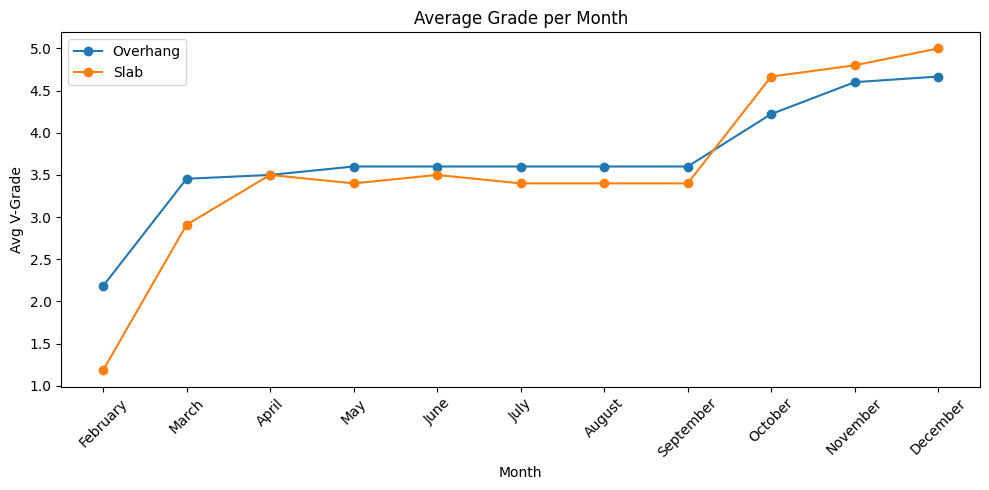

In [9]:

grade_map = {'V0': 0, 'V1': 1, 'V2': 2, 'V3': 3, 'V4': 4, 'V5': 5}
df['OverhangGradeNum'] = df['Overhang Grade Attempted'].map(grade_map)
df['SlabGradeNum']      = df['Slab Grade Attempted']    .map(grade_map)

monthly = df.groupby('Month').agg({
    'OverhangGradeNum': 'mean',
    'SlabGradeNum': 'mean'
}).reset_index()

monthly['MonthName'] = monthly['Month'].map(month_map)

plt.figure(figsize=(10, 5))
plt.plot(monthly['MonthName'], monthly['OverhangGradeNum'], marker='o', label='Overhang')
plt.plot(monthly['MonthName'], monthly['SlabGradeNum'], marker='o', label='Slab')
plt.title('Average Grade per Month')
plt.xlabel('Month')
plt.ylabel('Avg V-Grade')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Completion by Grade

Overhang Completed? (Y/N),N,Y
Overhang Grade Attempted,,
V1,0,3
V2,0,3
V3,20,16
V4,40,14
V5,12,2


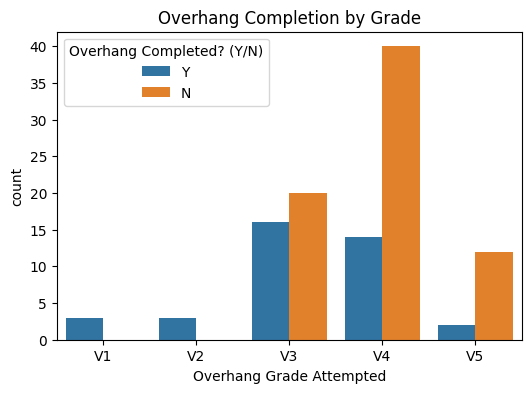

Slab Completed? (Y/N),N,Y
Slab Grade Attempted,,
V0,0,3
V1,0,3
V2,2,5
V3,15,27
V4,26,6
V5,11,12


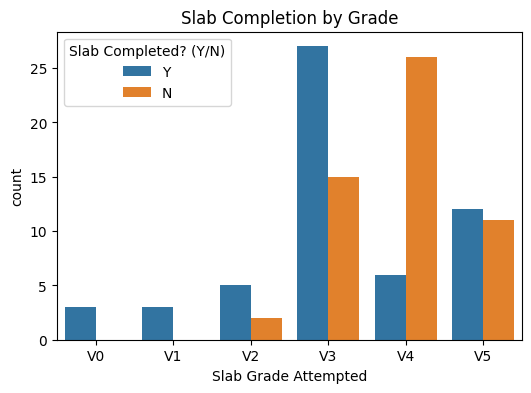

In [10]:
overhang_ct = pd.crosstab(df['Overhang Grade Attempted'], df['Overhang Completed? (Y/N)'])
display(overhang_ct)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Overhang Grade Attempted', hue='Overhang Completed? (Y/N)')
plt.title('Overhang Completion by Grade')
plt.show()

slab_ct = pd.crosstab(df['Slab Grade Attempted'], df['Slab Completed? (Y/N)'])
display(slab_ct)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Slab Grade Attempted', hue='Slab Completed? (Y/N)')
plt.title('Slab Completion by Grade')
plt.show()



# Attempts Correlation

C:\Users\ekere\AppData\Local\Temp\ipykernel_23332\292563940.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_corr = df.groupby('Month').apply(


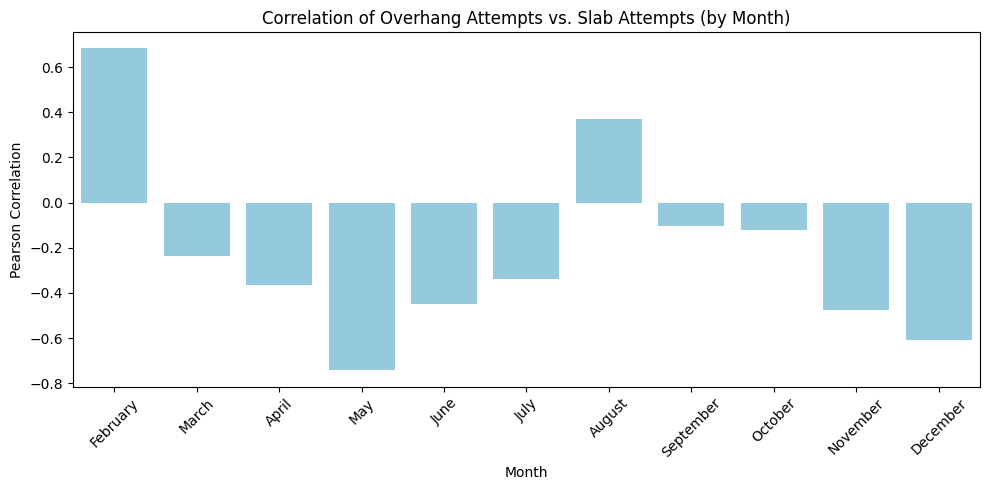

In [11]:
monthly_corr = df.groupby('Month').apply(
    lambda g: g['Overhang Attempts'].corr(g['Slab Attempts'])
).reset_index()

monthly_corr.columns = ['Month', 'Correlation']

monthly_corr['MonthName'] = monthly_corr['Month'].map(month_map)

plt.figure(figsize=(10, 5))
sns.barplot(x='MonthName', y='Correlation', data=monthly_corr, color='skyblue')
plt.title('Correlation of Overhang Attempts vs. Slab Attempts (by Month)')
plt.xlabel('Month')
plt.ylabel('Pearson Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap

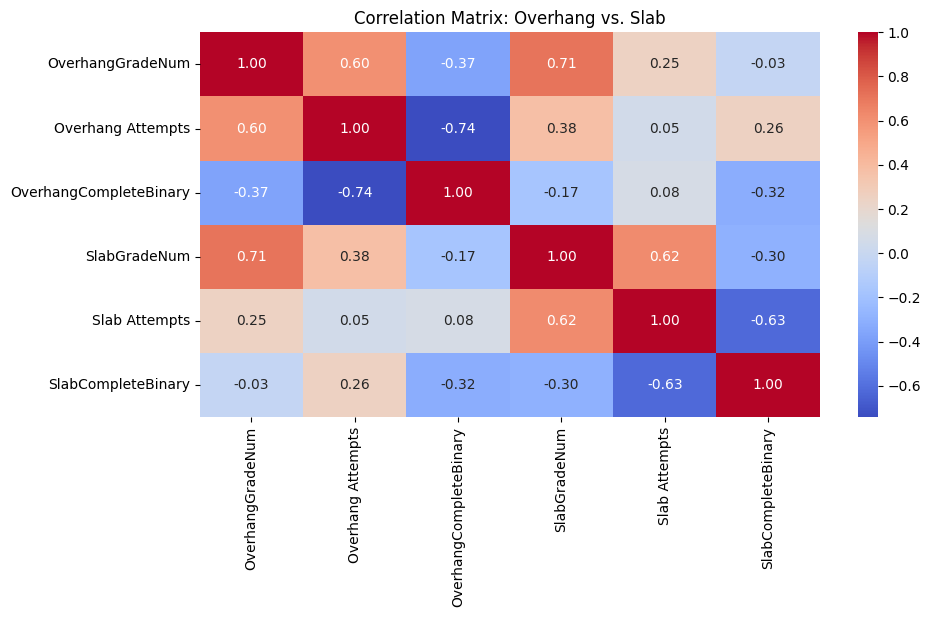

In [12]:
df['OverhangCompleteBinary'] = df['Overhang Completed? (Y/N)'].map({'Y': 1, 'N': 0})
df['SlabCompleteBinary']     = df['Slab Completed? (Y/N)'].map({'Y': 1, 'N': 0})

cols_for_corr = [
    'OverhangGradeNum', 
    'Overhang Attempts',
    'OverhangCompleteBinary',
    'SlabGradeNum', 
    'Slab Attempts',
    'SlabCompleteBinary'
]

corr_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Overhang vs. Slab')
plt.show()


# Highest Grade Each Month and the Fewest Attempts It Took

C:\Users\ekere\AppData\Local\Temp\ipykernel_23332\2353593971.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_monthly = df.groupby('Month').apply(get_highest_grade_and_min_attempts).reset_index()


,Month,OverhangMaxGrade,OverhangMinAttemptsForMax,SlabMaxGrade,SlabMinAttemptsForMax,MonthName
0,2.0,3.0,7.0,2.0,3.0,February
1,3.0,4.0,8.0,4.0,15.0,March
2,4.0,4.0,9.0,4.0,8.0,April
3,5.0,4.0,9.0,4.0,11.0,May
4,6.0,4.0,10.0,4.0,7.0,June
5,7.0,4.0,8.0,4.0,10.0,July
6,8.0,4.0,7.0,4.0,12.0,August
7,9.0,4.0,9.0,4.0,9.0,September
8,10.0,5.0,13.0,5.0,9.0,October
9,11.0,5.0,7.0,5.0,7.0,November


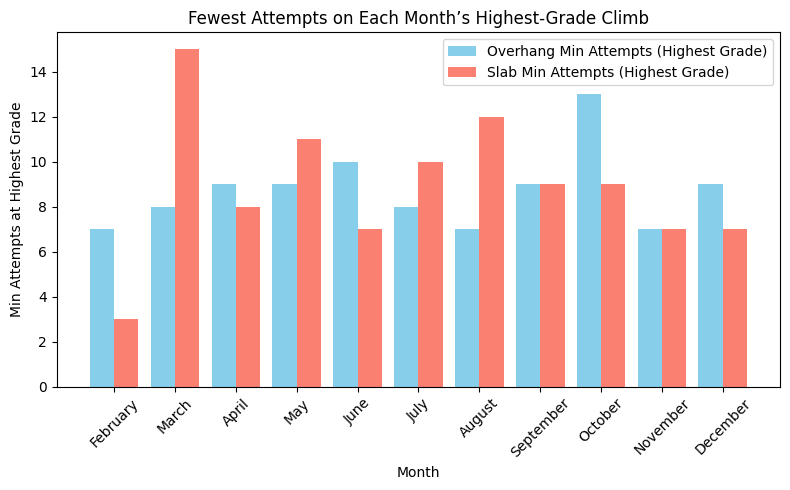

In [13]:
def get_highest_grade_and_min_attempts(subdf):
    oh_max_grade = subdf['OverhangGradeNum'].max()
    oh_min_attempts_for_max = subdf.loc[subdf['OverhangGradeNum'] == oh_max_grade, 'Overhang Attempts'].min()

    slab_max_grade = subdf['SlabGradeNum'].max()
    slab_min_attempts_for_max = subdf.loc[subdf['SlabGradeNum'] == slab_max_grade, 'Slab Attempts'].min()

    return pd.Series({
        'OverhangMaxGrade': oh_max_grade,
        'OverhangMinAttemptsForMax': oh_min_attempts_for_max,
        'SlabMaxGrade': slab_max_grade,
        'SlabMinAttemptsForMax': slab_min_attempts_for_max
    })

highest_monthly = df.groupby('Month').apply(get_highest_grade_and_min_attempts).reset_index()

highest_monthly['MonthName'] = highest_monthly['Month'].map(month_map)

display(highest_monthly)

x = range(len(highest_monthly))
width = 0.4

plt.figure(figsize=(8,5))
plt.bar([p - width/2 for p in x],
        highest_monthly['OverhangMinAttemptsForMax'],
        width, label='Overhang Min Attempts (Highest Grade)', color='skyblue')

plt.bar([p + width/2 for p in x],
        highest_monthly['SlabMinAttemptsForMax'],
        width, label='Slab Min Attempts (Highest Grade)', color='salmon')

plt.xticks(x, highest_monthly['MonthName'], rotation=45)
plt.xlabel('Month')
plt.ylabel('Min Attempts at Highest Grade')
plt.title('Fewest Attempts on Each Month’s Highest-Grade Climb')
plt.legend()
plt.tight_layout()
plt.show()


# Comparisons Between Gym A and B

Gym Comparison (Mean Grades & Completion Rates):


,Gym,OverhangGradeNum,OverhangCompleteBinary,SlabGradeNum,SlabCompleteBinary
0,Gym A,3.672727,0.327273,3.509091,0.454545
1,Gym B,3.654545,0.363636,3.509091,0.563636


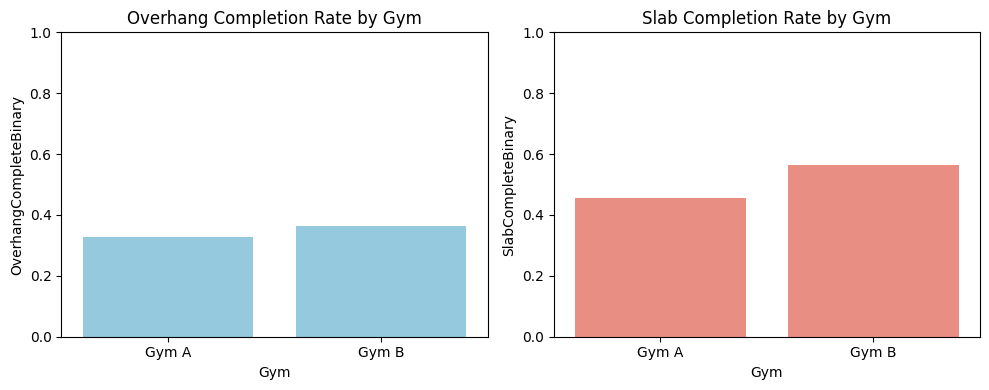

In [14]:
df['OverhangCompleteBinary'] = df['Overhang Completed? (Y/N)'].map({'Y':1,'N':0})
df['SlabCompleteBinary']     = df['Slab Completed? (Y/N)'].map({'Y':1,'N':0})

gym_stats = df.groupby('Gym').agg({
    'OverhangGradeNum': 'mean',
    'OverhangCompleteBinary': 'mean',
    'SlabGradeNum': 'mean',
    'SlabCompleteBinary': 'mean'
}).reset_index()

print("Gym Comparison (Mean Grades & Completion Rates):")
display(gym_stats)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=gym_stats, x='Gym', y='OverhangCompleteBinary', color='skyblue')
plt.title('Overhang Completion Rate by Gym')
plt.ylim(0,1)

plt.subplot(1,2,2)
sns.barplot(data=gym_stats, x='Gym', y='SlabCompleteBinary', color='salmon')
plt.title('Slab Completion Rate by Gym')
plt.ylim(0,1)

plt.tight_layout()
plt.show()